In [7]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib as mpl

import glob
import os
from tqdm import tqdm

### Define colors an colormaps

In [8]:
# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

Clr = [(0.00, 0.00, 0.00),
      (0.31, 0.24, 0.00),
      (0.43, 0.16, 0.49),
      (0.32, 0.70, 0.30),
      (0.45, 0.70, 0.90),
      (1.00, 0.82, 0.67)]

### Read data, refactor, plot, and save

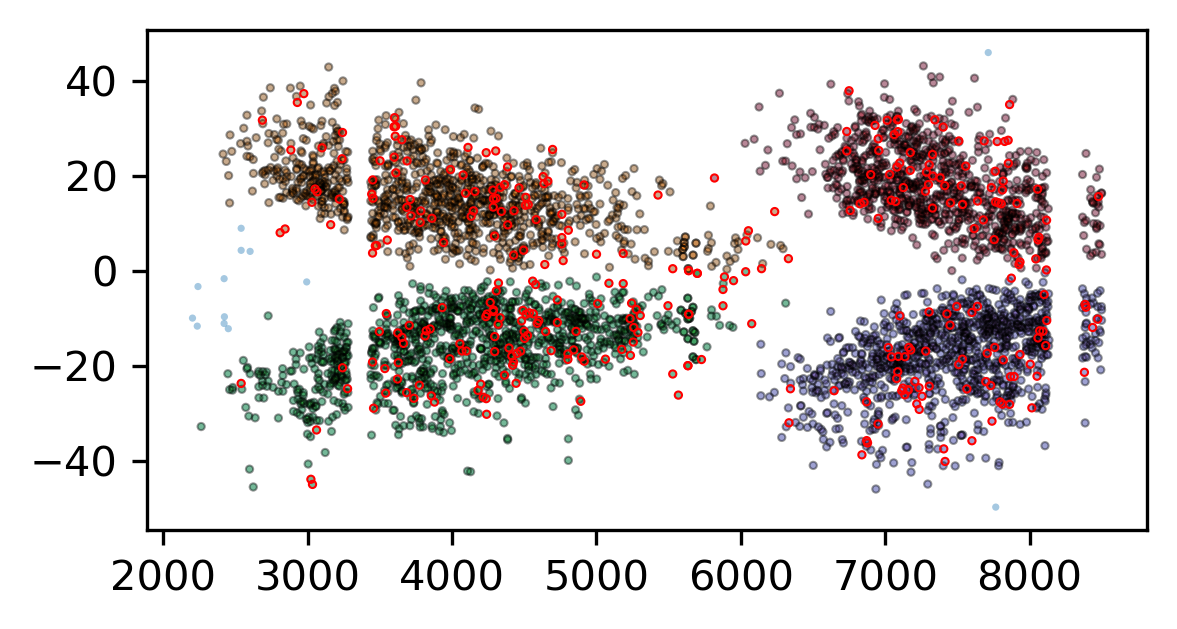

In [9]:
KPVT = pd.read_csv('data\output\BARD_1976-1993_KPVT_tilts.csv')
KPVT['Cycle21n'] = np.logical_or(KPVT['HH_21n'], KPVT['AH_21n'])
KPVT['Cycle21s'] = np.logical_or(KPVT['HH_21s'], KPVT['AH_21s'])
KPVT['Cycle22n'] = np.logical_or(KPVT['HH_22n'], KPVT['AH_22n'])
KPVT['Cycle22s'] = np.logical_or(KPVT['HH_22s'], KPVT['AH_22s'])

KPVT['Hale'] = np.logical_or(KPVT['HH_21n'], KPVT['HH_21s'])
KPVT['Hale'] = np.logical_or(KPVT['Hale'], KPVT['HH_22n'])
KPVT['Hale'] = np.logical_or(KPVT['Hale'], KPVT['HH_22s'])

KPVT['AntiHale'] = np.logical_or(KPVT['AH_21n'], KPVT['AH_21s'])
KPVT['AntiHale'] = np.logical_or(KPVT['AntiHale'], KPVT['AH_22n'])
KPVT['AntiHale'] = np.logical_or(KPVT['AntiHale'], KPVT['AH_22s'])


# Size definitions
dpi = 300
pxx = 1000  # Horizontal size of each panel
pxy = 500  # Vertical size of each panel

nph = 5     # Number of horizontal panels
npv = 6     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])

ax1.scatter(KPVT['ReferenceDay'], KPVT['BMRLatitude'], s=3, alpha=0.4, ec='None', label='KPVT/512')

mask = KPVT['Cycle21n'] 
ax1.scatter(KPVT.loc[mask,'ReferenceDay'], KPVT.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='KPVT/512')

mask = KPVT['Cycle21s'] 
ax1.scatter(KPVT.loc[mask,'ReferenceDay'], KPVT.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='KPVT/512')

mask = KPVT['Cycle22n'] 
ax1.scatter(KPVT.loc[mask,'ReferenceDay'], KPVT.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='KPVT/512')

mask = KPVT['Cycle22s'] 
ax1.scatter(KPVT.loc[mask,'ReferenceDay'], KPVT.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='KPVT/512')

mask = KPVT['Hale'] 
ax1.scatter(KPVT.loc[mask,'ReferenceDay'], KPVT.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='k', fc='None', label='KPVT/512', lw=0.5)

mask = KPVT['AntiHale'] 
ax1.scatter(KPVT.loc[mask,'ReferenceDay'], KPVT.loc[mask,'BMRLatitude'], s=3, alpha=1, ec='r', fc='None', label='KPVT/512', lw=0.5)

KPVT.to_csv('data/output/BARD_1976-1993_KPVT_tilts.csv', index=False)


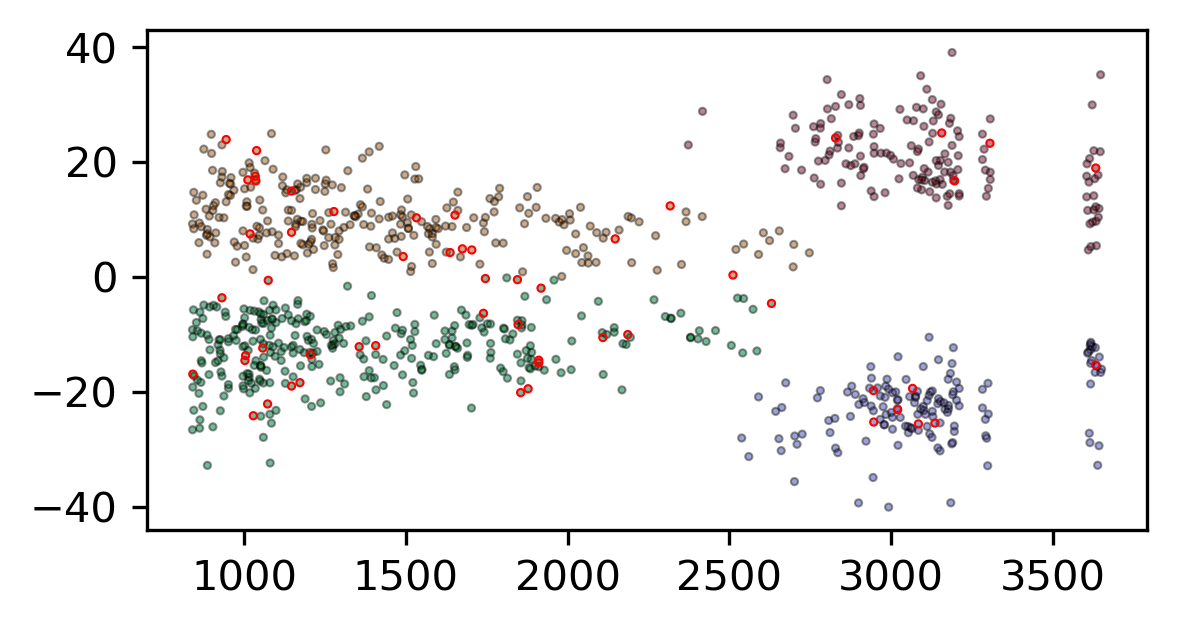

In [10]:
SPMG = pd.read_csv('data\output\BARD_1992-1999_SPMG_tilts.csv')
SPMG['Cycle22n'] = np.logical_or(SPMG['HH_22n'], SPMG['AH_22n'])
SPMG['Cycle22s'] = np.logical_or(SPMG['HH_22s'], SPMG['AH_22s'])
SPMG['Cycle23n'] = np.logical_or(SPMG['HH_23n'], SPMG['AH_23n'])
SPMG['Cycle23s'] = np.logical_or(SPMG['HH_23s'], SPMG['AH_23s'])

SPMG['Hale'] = np.logical_or(SPMG['HH_23n'], SPMG['HH_23s'])
SPMG['Hale'] = np.logical_or(SPMG['Hale'], SPMG['HH_22n'])
SPMG['Hale'] = np.logical_or(SPMG['Hale'], SPMG['HH_22s'])

SPMG['AntiHale'] = np.logical_or(SPMG['AH_23n'], SPMG['AH_23s'])
SPMG['AntiHale'] = np.logical_or(SPMG['AntiHale'], SPMG['AH_22n'])
SPMG['AntiHale'] = np.logical_or(SPMG['AntiHale'], SPMG['AH_22s'])


# Size definitions
dpi = 300
pxx = 1000  # Horizontal size of each panel
pxy = 500  # Vertical size of each panel

nph = 5     # Number of horizontal panels
npv = 6     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])

ax1.scatter(SPMG['ReferenceDay'], SPMG['BMRLatitude'], s=3, alpha=0.4, ec='None', label='SPMG/512')

mask = SPMG['Cycle22n'] 
ax1.scatter(SPMG.loc[mask,'ReferenceDay'], SPMG.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='SPMG/512')

mask = SPMG['Cycle22s'] 
ax1.scatter(SPMG.loc[mask,'ReferenceDay'], SPMG.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='SPMG/512')

mask = SPMG['Cycle23n'] 
ax1.scatter(SPMG.loc[mask,'ReferenceDay'], SPMG.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='SPMG/512')

mask = SPMG['Cycle23s'] 
ax1.scatter(SPMG.loc[mask,'ReferenceDay'], SPMG.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='SPMG/512')

mask = SPMG['Hale'] 
ax1.scatter(SPMG.loc[mask,'ReferenceDay'], SPMG.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='k', fc='None', label='SPMG/512', lw=0.5)

mask = SPMG['AntiHale'] 
ax1.scatter(SPMG.loc[mask,'ReferenceDay'], SPMG.loc[mask,'BMRLatitude'], s=3, alpha=1, ec='r', fc='None', label='SPMG/512', lw=0.5)

SPMG.to_csv('data/output/BARD_1992-1999_SPMG_tilts.csv', index=False)


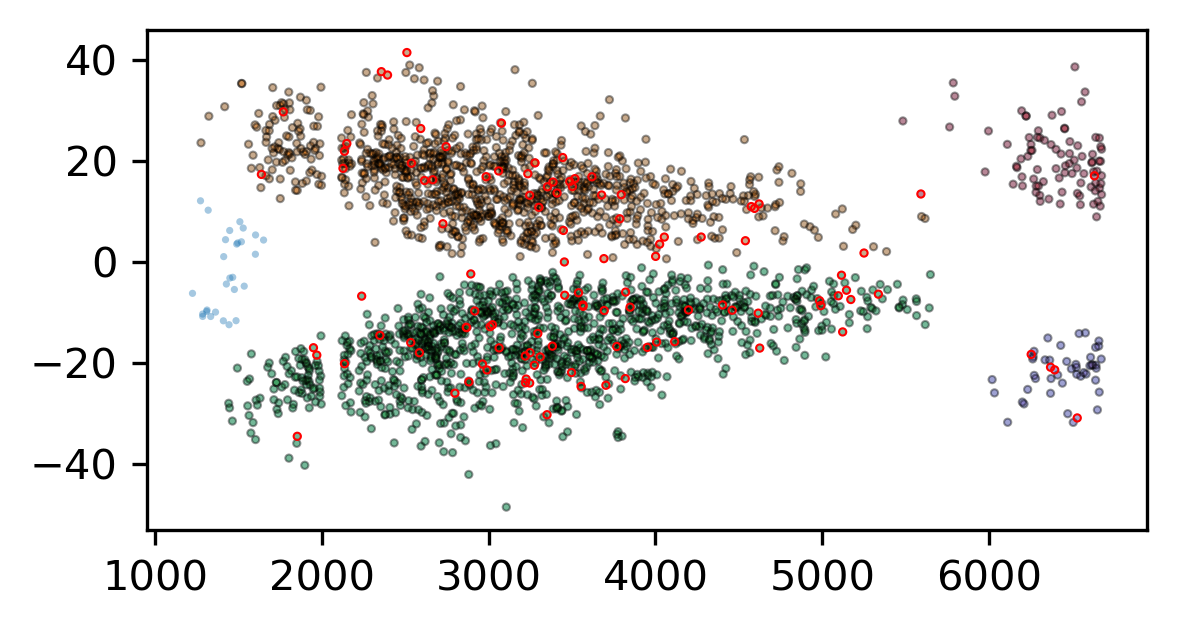

In [11]:
MDI = pd.read_csv('data\output\BARD_1996-2010_MDI_tilts.csv')
MDI['Cycle23n'] = np.logical_or(MDI['HH_23n'], MDI['AH_23n'])
MDI['Cycle23s'] = np.logical_or(MDI['HH_23s'], MDI['AH_23s'])
MDI['Cycle24n'] = np.logical_or(MDI['HH_24n'], MDI['AH_24n'])
MDI['Cycle24s'] = np.logical_or(MDI['HH_24s'], MDI['AH_24s'])

MDI['Hale'] = np.logical_or(MDI['HH_23n'], MDI['HH_23s'])
MDI['Hale'] = np.logical_or(MDI['Hale'], MDI['HH_24n'])
MDI['Hale'] = np.logical_or(MDI['Hale'], MDI['HH_24s'])

MDI['AntiHale'] = np.logical_or(MDI['AH_23n'], MDI['AH_23s'])
MDI['AntiHale'] = np.logical_or(MDI['AntiHale'], MDI['AH_24n'])
MDI['AntiHale'] = np.logical_or(MDI['AntiHale'], MDI['AH_24s'])


# Size definitions
dpi = 300
pxx = 1000  # Horizontal size of each panel
pxy = 500  # Vertical size of each panel

nph = 5     # Number of horizontal panels
npv = 6     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])

ax1.scatter(MDI['ReferenceDay'], MDI['BMRLatitude'], s=3, alpha=0.4, ec='None', label='MDI/512')

mask = MDI['Cycle23n'] 
ax1.scatter(MDI.loc[mask,'ReferenceDay'], MDI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='MDI/512')

mask = MDI['Cycle23s'] 
ax1.scatter(MDI.loc[mask,'ReferenceDay'], MDI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='MDI/512')

mask = MDI['Cycle24n'] 
ax1.scatter(MDI.loc[mask,'ReferenceDay'], MDI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='MDI/512')

mask = MDI['Cycle24s'] 
ax1.scatter(MDI.loc[mask,'ReferenceDay'], MDI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='MDI/512')

mask = MDI['Hale'] 
ax1.scatter(MDI.loc[mask,'ReferenceDay'], MDI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='k', fc='None', label='MDI/512', lw=0.5)

mask = MDI['AntiHale'] 
ax1.scatter(MDI.loc[mask,'ReferenceDay'], MDI.loc[mask,'BMRLatitude'], s=3, alpha=1, ec='r', fc='None', label='MDI/512', lw=0.5)

MDI.to_csv('data/output/BARD_1996-2010_MDI_tilts.csv', index=False)


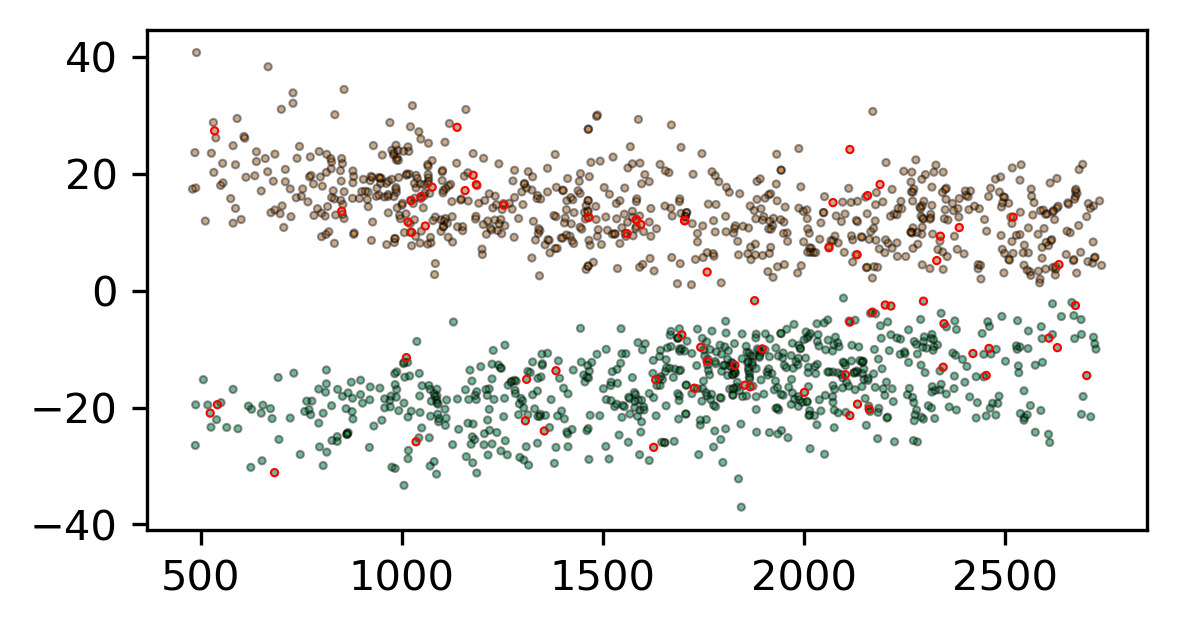

In [12]:
HMI = pd.read_csv('data\output\BARD_2010-2016_HMI_tilts.csv')
HMI['Cycle24n'] = np.logical_or(HMI['HH_24n'], HMI['AH_24n'])
HMI['Cycle24s'] = np.logical_or(HMI['HH_24s'], HMI['AH_24s'])

HMI['Hale'] = np.logical_or(HMI['HH_24n'], HMI['HH_24s'])

HMI['AntiHale'] = np.logical_or(HMI['AH_24n'], HMI['AH_24s'])


# Size definitions
dpi = 300
pxx = 1000  # Horizontal size of each panel
pxy = 500  # Vertical size of each panel

nph = 5     # Number of horizontal panels
npv = 6     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])

ax1.scatter(HMI['ReferenceDay'], HMI['BMRLatitude'], s=3, alpha=0.4, ec='None', label='HMI/512')

mask = HMI['Cycle24n'] 
ax1.scatter(HMI.loc[mask,'ReferenceDay'], HMI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='HMI/512')

mask = HMI['Cycle24s'] 
ax1.scatter(HMI.loc[mask,'ReferenceDay'], HMI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='None', label='HMI/512')

mask = HMI['Hale'] 
ax1.scatter(HMI.loc[mask,'ReferenceDay'], HMI.loc[mask,'BMRLatitude'], s=3, alpha=0.4, ec='k', fc='None', label='HMI/512', lw=0.5)

mask = HMI['AntiHale'] 
ax1.scatter(HMI.loc[mask,'ReferenceDay'], HMI.loc[mask,'BMRLatitude'], s=3, alpha=1, ec='r', fc='None', label='HMI/512', lw=0.5)

HMI.to_csv('data/output/BARD_2010-2016_HMI_tilts.csv', index=False)
